<a href="https://colab.research.google.com/github/VedantPhuse/TrafficSignClassifier/blob/master/TrafficSignClassifierKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data from Kaggle

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantphuse","key":"c3ae690b518eda304dd5b9f685c94806"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
#giving permissions
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:11<00:00, 38.7MB/s]
100% 612M/612M [00:11<00:00, 55.7MB/s]


In [ ]:
from IPython.display import clear_output

In [ ]:
!unzip gtsrb-german-traffic-sign.zip
clear_output()

# Preparing Data

In [1]:
# Importing Libraries
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Making sure that the graphs some in the notebook itself
%matplotlib inline

In [2]:
# Empty lists for data and labels
data = []
labels = []

# We have 43 Classes
classes = 43

# Path for future use
cur_path = '/content/'

In [3]:
classnames = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Loading Data

In [4]:
# using PIL to read images
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try: #using try and except for ease of coding
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
# Converting data to numpy array
data = np.array(data)
labels = np.array(labels)

In [6]:
#Checking the shape of the input and labels
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


The corresponding traffic sign at index 15233 reads: No passing veh over 3.5 tons


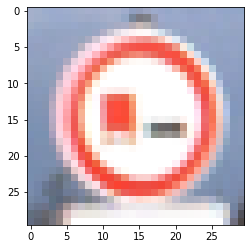

In [95]:
#Checking a random 
l = random.randint(0, data.shape[0])
plt.imshow(data[l])
print("The corresponding traffic sign at index", l,  "reads:" ,classnames[labels[l]+1])

In [8]:
# Using sklearn for splitting the training data for training and validation
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the training data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
# One Hot encoding the traffic signs using to_categorical from Keras
from keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [13]:
# Checking if the one hot encoding worked
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [14]:
X_train = X_train / 255
X_test = X_test / 255

# Buiding a CNN Model

In [15]:
# Using Keras to build the model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [16]:
# Building a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the Model

In [18]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, shuffle = True, validation_data=(X_test, y_test))

Epoch 1/10
491/491 [==============================] - 118s 240ms/step - loss: 1.5124 - accuracy: 0.5810 - val_loss: 0.1969 - val_accuracy: 0.9466
Epoch 2/10
491/491 [==============================] - 119s 242ms/step - loss: 0.2762 - accuracy: 0.9158 - val_loss: 0.0875 - val_accuracy: 0.9790
Epoch 3/10
491/491 [==============================] - 118s 239ms/step - loss: 0.1147 - accuracy: 0.9649 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 5/10
491/491 [==============================] - 119s 241ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.0278 - val_accuracy: 0.9917
Epoch 6/10
491/491 [==============================] - 118s 240ms/step - loss: 0.0816 - accuracy: 0.9752 - val_loss: 0.0267 - val_accuracy: 0.9931
Epoch 7/10
491/491 [==============================] - 118s 241ms/step - loss: 0.0735 - accuracy: 0.9782 - val_loss: 0.0249 - val_accuracy: 0.9934
Epoch 8/10
491/491 [==============================] - 118s 240ms/step - loss: 0.0598 - accuracy: 0.9828 - val_loss: 0.0232 -

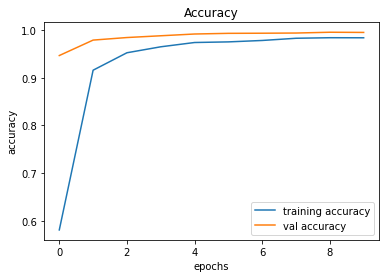

In [19]:
# Plotting the accuracy change with epochs, using the built in history function of Keras 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

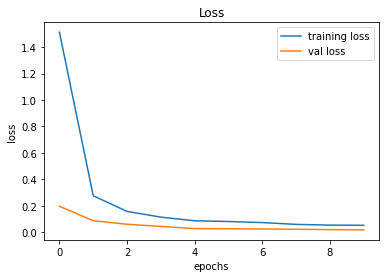

In [20]:
# Plotting the loss change with epochs, again using the history function of Keras 
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model

In [21]:
import pandas as pd

In [22]:
# Loading the test data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [23]:
X_test, label = testing('Test.csv')

In [24]:
Y_pred = model.predict(X_test)
Y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
Y_pred.shape

(12630, 43)

In [28]:
label.shape

(12630,)

In [29]:
print(type(label))

<class 'numpy.ndarray'>


In [55]:
Y_pred_list = Y_pred.tolist()

In [61]:
Y_pred_soln = []
for i in range (0, Y_pred.shape[0]):
  if(Y_pred_list[i].count(1.) == 1):
    ix = Y_pred_list[i].index(1.)
  else:
    ix = 0
  Y_pred_soln.append(ix) 

In [62]:
print(Y_pred_soln)

[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 34, 0, 2, 17, 3, 12, 16, 8, 7, 30, 18, 12, 24, 25, 3, 10, 31, 8, 31, 13, 15, 9, 13, 35, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 18, 2, 5, 28, 11, 25, 11, 34, 5, 12, 1, 10, 25, 25, 21, 33, 25, 7, 10, 35, 3, 7, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, 11, 3, 27, 29, 1, 17, 13, 7, 1, 8, 2, 10, 10, 0, 1, 6, 36, 3, 14, 13, 11, 10, 18, 40, 2, 38, 41, 4, 6, 18, 17, 25, 2, 41, 11, 21, 7, 24, 11, 25, 17, 3, 6, 9, 7, 4, 13, 16, 4, 25, 18, 9, 13, 14, 29, 17, 13, 38, 26, 25, 33, 1, 3, 40, 13, 2, 8, 4, 36, 25, 20, 25, 18, 1, 10, 8, 10, 29, 12, 38, 31, 2, 8, 38, 1, 28, 17, 9, 4, 1, 17, 9, 2, 31, 13, 15, 15, 38, 25, 5, 25, 13, 10, 5, 4, 10, 2, 4, 5, 1, 14, 12, 12, 5, 8, 36, 25, 13, 33, 18, 33, 19, 12, 40, 4, 18, 12, 13, 20, 0, 10, 40, 5, 8, 12, 38, 20, 14, 0, 36, 34, 28, 35, 13, 25, 15, 35, 14, 18, 25, 1, 38, 5, 25, 2, 18, 27, 18, 34, 9,

In [63]:
len(Y_pred_soln)

12630

In [64]:
Y_pred_arr = np.array(Y_pred_soln)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred_arr))

0.9503562945368171


In [67]:
1+1

2

# Checking for external input

I have added this image into the runtime, which has been downloaded from Google.

Lets check if the model works properly for this.

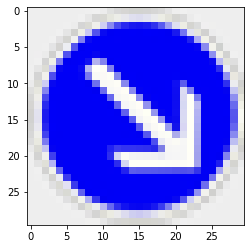

In [109]:
# Showing the image
image = Image.open('Testsign.jpg')
image = image.resize((30,30))
image = np.array(image)

plt.imshow(image)

In [110]:
# Preparing the image for prediction 
image = Image.open('Testsign.jpg')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image / 255

In [111]:
# Running it through the model
predtest = model.predict([image])[0]
print("The predicted array:", predtest)
print("Type of predicted array: ", type(predtest))
print("Index of arg = " , np.argmax(predtest))
please = np.argmax(predtest)
thesign = classnames [please + 1]
print("The sign reads : ", thesign)

The predicted array: [0.00000000e+00 3.95583283e-37 1.37152297e-38 9.74275838e-29
 0.00000000e+00 8.10348053e-21 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.09554800e-33 1.92960880e-32
 2.98925216e-32 3.21881141e-34 0.00000000e+00 0.00000000e+00
 6.69887659e-37 0.00000000e+00 4.36311597e-38 0.00000000e+00
 5.77813299e-25 7.11476772e-32 0.00000000e+00 1.00273853e-31
 1.04081670e-36 1.52649931e-31 0.00000000e+00 0.00000000e+00
 1.17002764e-32 3.47475241e-27 8.19504820e-32 8.47074501e-25
 0.00000000e+00 1.45173220e-37 1.09799843e-11 4.28651594e-24
 1.43192305e-19 0.00000000e+00 1.00000000e+00 5.30833454e-36
 1.36900732e-17 0.00000000e+00 0.00000000e+00]
Type of predicted array:  <class 'numpy.ndarray'>
Index of arg =  38
The sign reads :  Keep right


The predicted array: [3.0415525e-13 1.8911295e-07 8.8042112e-10 1.8410568e-11 4.2110973e-10
 9.9998605e-01 1.3700742e-05 6.8421495e-13 1.1967543e-14 2.3708640e-18
 1.1894914e-12 5.8288665e-15 5.2364731e-16 1.8023306e-18 6.6673121e-14
 6.4375359e-15 4.1183472e-16 2.1444796e-19 2.6360086e-16 9.9900092e-19
 3.9533869e-18 1.2990265e-19 2.3078083e-21 8.9487326e-20 9.9790534e-24
 2.3406375e-15 1.4479269e-17 3.3964767e-21 1.6679966e-18 1.3571604e-15
 7.5952916e-22 2.1629705e-14 6.4047737e-19 6.8104182e-17 8.9348502e-20
 1.5881694e-17 2.6302406e-18 1.4774129e-19 4.3500740e-16 2.8302773e-18
 1.2751913e-16 7.6052351e-22 8.5598990e-15]
Type of predicted array:  <class 'numpy.ndarray'>
Index of arg =  5
The sign reads :  Speed limit (80km/h)


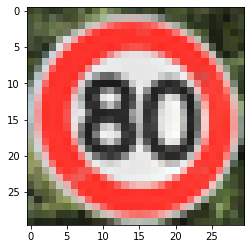

In [115]:
image = Image.open('Testsign2.jpg')

image = image.resize((30,30))
image = np.array(image)

plt.imshow(image)

image = Image.open('Testsign2.jpg')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image / 255

predtest = model.predict([image])[0]
print("The predicted array:", predtest)
print("Type of predicted array: ", type(predtest))
print("Index of arg = " , np.argmax(predtest))
please = np.argmax(predtest)
thesign = classnames [please + 1]
print("The sign reads : ", thesign)

The predicted array: [2.71019715e-36 7.25473328e-24 1.40569414e-28 4.20175760e-26
 4.69914520e-33 2.92327302e-23 7.04493907e-28 3.02391955e-26
 1.04497751e-21 4.04202822e-24 3.55629077e-31 1.06718806e-26
 3.23983910e-26 1.19092741e-22 0.00000000e+00 1.99461101e-29
 3.51816272e-21 3.56172929e-34 1.03439850e-24 1.57219229e-33
 9.17310522e-19 5.98881721e-30 1.99086701e-33 2.76544311e-29
 1.68848433e-28 7.78542415e-23 2.21293788e-26 1.30722732e-33
 5.43268445e-20 3.46004806e-24 1.60263268e-25 1.11984786e-31
 8.06817904e-24 5.70939291e-19 3.30993405e-14 9.99999642e-01
 3.07158643e-07 3.16425301e-21 7.20472990e-17 6.39155894e-19
 8.52903696e-18 4.25624159e-23 3.05127731e-26]
Type of predicted array:  <class 'numpy.ndarray'>
Index of arg =  35
The sign reads :  Ahead only


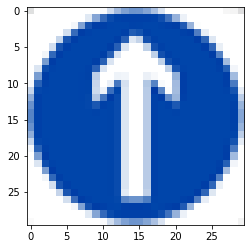

In [118]:
image = Image.open('Testsign5.jpg')

image = image.resize((30,30))
image = np.array(image)

plt.imshow(image)

image = Image.open('Testsign5.jpg')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image / 255

predtest = model.predict([image])[0]
print("The predicted array:", predtest)
print("Type of predicted array: ", type(predtest))
print("Index of arg = " , np.argmax(predtest))
please = np.argmax(predtest)
thesign = classnames [please + 1]
print("The sign reads : ", thesign)

# Conclusion

So, as we have checked, the classifier made using the Kaggle data and Keras works properly, wih an accuracy of:

* 98.38% on training data set
* 99.50% on validation data set
* 95.03% on test data set